In [53]:
import numpy as np
import pandas as pd
import seaborn as sns

In [54]:
import tweepy 
from textblob import TextBlob

In [55]:
import re

In [56]:
import matplotlib.pyplot as plt

In [57]:
df=pd.read_csv('Twitter.csv')

In [58]:
df.head()

,twitterApiKey,twitterApiSecret,twitterApiAccessToken,twitterApiAccessTokenSecret
0,hsoBg1jyydpIYLQb40E9hj1N9,cVCzel2FEKv8hyhu7Qxei0dozF1v1n1tfd32JpcVOIAkG3...,1459167848513765382-RFf6qpbaxLSILLLTQVTkRx8qgA...,9uXrghABgomgWYKznz7CU6GfBFgL4xqxxgIIc2uGPep8i


In [59]:
twitterApiKey='OCgWzDW6PaBvBeVimmGBqdAg1'
twitterApiSecret='tBKnmyg5Jfsewkpmw74gxHZbbZkGIH6Ee4rsM0lD1vFL7SrEIM'
twitterApiAccessToken='1449663645412065281-LNjZoEO9lxdtxPcmLtM35BRdIKYHpk'
twitterApiAccessTokenSecret='FL3SGsUWSzPVFnG7bNMnyh4vYK8W1SlABBNtdF7Xcbh7a'

In [60]:
auth=tweepy.OAuthHandler(twitterApiKey,twitterApiSecret)
auth.set_access_token(twitterApiAccessToken,twitterApiAccessTokenSecret)
twitterApi=tweepy.API(auth,wait_on_rate_limit=True)

In [70]:
twitterAccount="@imVkohli"

In [71]:
tweets = tweepy.Cursor(
        twitterApi.user_timeline,
        screen_name=twitterAccount,
        count=None,
        since_id=None,
        max_id=None,trim_user=True,
        exclude_replies=True,contribubtor_details=False,include_entities=False).items(50)

In [72]:
tweets

In [73]:
df_tweets=pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['Tweet'])

Unexpected parameter: contribubtor_details
Unexpected parameter: include_entities
Unexpected parameter: contribubtor_details
Unexpected parameter: include_entities
Unexpected parameter: contribubtor_details
Unexpected parameter: include_entities


In [74]:
df_tweets.head()

,Tweet
0,"Be at your best, and the first to get my Elect..."
1,When in the tube 🤷🏻♂️ https://t.co/poEzsCpnTm
2,O’cean Fruit Water is my favourite hydration b...
3,12 years in test cricket today. Forever gratef...
4,It's time to be better with #Batwrap \n \nI’m ...


In [80]:
def preprocess(text):
    text = re.sub(r'@\w+\s?', '', text)
    
    # remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    
    # remove unnecessary whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [81]:
df_tweets['Tweet']=df_tweets['Tweet'].apply(preprocess)

In [86]:
df_tweets

,Tweet
0,be at your best and the first to get my electr...
1,when in the tube httpstcopoezscpntm
2,ocean fruit water is my favourite hydration bo...
3,years in test cricket today forever grateful h...
4,its time to be better with batwrap im proud to...
5,look for excuses or look to get better httpstc...
6,congratulations amp on sealing citys seventh f...
7,my records my awards my wins amp losses wipemy...
8,saddened to hear about the tragic train accide...
9,unlock the unexpected wrogn treasures with the...


In [89]:
def get_text_subjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [90]:
def get_text_polarity(txt):
    return TextBlob(txt).sentiment.polarity

In [91]:
get_text_subjectivity("if you have six sisters, that might influence how you view women or families ")

0.0

In [92]:
df_tweets['Subjectivity']=df_tweets['Tweet'].apply(get_text_subjectivity)

In [93]:
df_tweets

,Tweet,Subjectivity
0,be at your best and the first to get my electr...,0.317576
1,when in the tube httpstcopoezscpntm,0.000000
2,ocean fruit water is my favourite hydration bo...,1.000000
3,years in test cricket today forever grateful h...,0.000000
4,its time to be better with batwrap im proud to...,0.533333
5,look for excuses or look to get better httpstc...,0.500000
6,congratulations amp on sealing citys seventh f...,0.450000
7,my records my awards my wins amp losses wipemy...,0.200000
8,saddened to hear about the tragic train accide...,0.750000
9,unlock the unexpected wrogn treasures with the...,1.000000


In [94]:
df_tweets['Polarity']=df_tweets['Tweet'].apply(get_text_polarity)

In [95]:
df_tweets

,Tweet,Subjectivity,Polarity
0,be at your best and the first to get my electr...,0.317576,0.197273
1,when in the tube httpstcopoezscpntm,0.000000,0.000000
2,ocean fruit water is my favourite hydration bo...,1.000000,1.000000
3,years in test cricket today forever grateful h...,0.000000,0.000000
4,its time to be better with batwrap im proud to...,0.533333,0.433333
5,look for excuses or look to get better httpstc...,0.500000,0.500000
6,congratulations amp on sealing citys seventh f...,0.450000,-0.200000
7,my records my awards my wins amp losses wipemy...,0.200000,0.300000
8,saddened to hear about the tragic train accide...,0.750000,-0.750000
9,unlock the unexpected wrogn treasures with the...,1.000000,0.100000


In [97]:
df_tweets.isnull().sum()

Tweet           0
Subjectivity    0
Polarity        0
dtype: int64

In [99]:
df_tweets=df_tweets.drop(df_tweets[df_tweets['Tweet']==''].index)

In [100]:
def get_text_sentiments(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"

In [105]:
df_tweets['Sentiments']=df_tweets['Polarity'].apply(get_text_sentiments)

In [106]:
df_tweets

,Tweet,Subjectivity,Polarity,Score,Sentiments
0,be at your best and the first to get my electr...,0.317576,0.197273,Positive,Positive
1,when in the tube httpstcopoezscpntm,0.000000,0.000000,Neutral,Neutral
2,ocean fruit water is my favourite hydration bo...,1.000000,1.000000,Positive,Positive
3,years in test cricket today forever grateful h...,0.000000,0.000000,Neutral,Neutral
4,its time to be better with batwrap im proud to...,0.533333,0.433333,Positive,Positive
5,look for excuses or look to get better httpstc...,0.500000,0.500000,Positive,Positive
6,congratulations amp on sealing citys seventh f...,0.450000,-0.200000,Negative,Negative
7,my records my awards my wins amp losses wipemy...,0.200000,0.300000,Positive,Positive
8,saddened to hear about the tragic train accide...,0.750000,-0.750000,Negative,Negative
9,unlock the unexpected wrogn treasures with the...,1.000000,0.100000,Positive,Positive


In [108]:
positive=df_tweets[df_tweets['Sentiments']=='Positive']

In [114]:
print((positive.shape[0]/df_tweets.shape[0])*100)

48.0


In [115]:
pos=positive.shape[0]/df.shape[0]*100

In [119]:
negative=df_tweets[df_tweets['Sentiments']=='Negative']
print((negative.shape[0]/df_tweets.shape[0])*100)
neg=negative.shape[0]/df.shape[0]*100

10.0


In [120]:
neutral=df_tweets[df_tweets['Sentiments']=='Neutral']
print((neutral.shape[0]/df_tweets.shape[0])*100)
neu=neutral.shape[0]/df.shape[0]*100

42.0


In [122]:
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes=[pos,neg,neu]
colors=['yellowgreen','lightblue','gold']

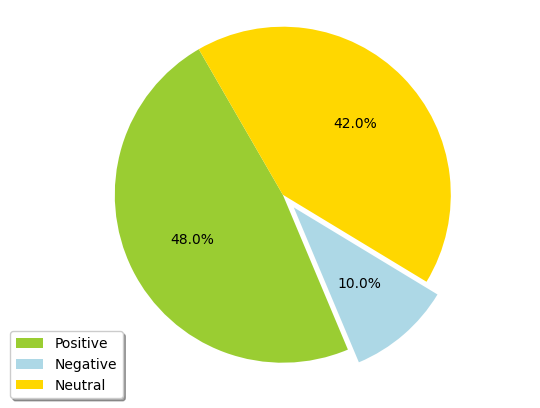

In [127]:
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,-0.05),shadow=True)
plt.axis('equal')
plt.show()

<BarContainer object of 3 artists>

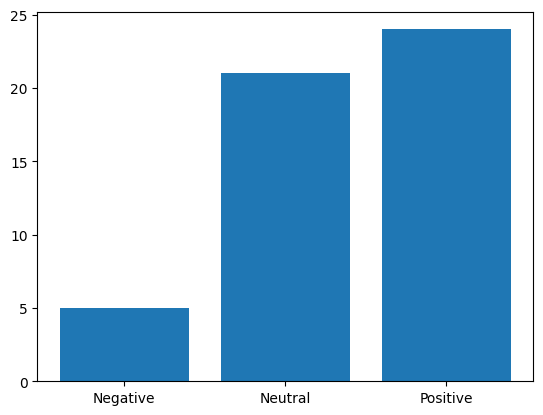

In [128]:
labels = df_tweets.groupby('Sentiments').count().index.values
values=df_tweets.groupby('Sentiments').size().values
plt.bar(labels,values)